In [6]:
!pip install pandas numpy matplotlib seaborn



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# 📘 Notebook 08: Regime Comparison & Selection

#This notebook compares the different regime detection methods — entropy-based, GMM-based, and HMM-based — both visually and quantitatively.

#### Objective:
"""
Compare regimes generated from three approaches:
- Entropy-Augmented (vol_regime + cluster_regime)
- Gaussian Mixture Model (GMM)
- Hidden Markov Model (HMM)

And decide which segmentation is more useful for adaptive robust portfolio optimization.

"""

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
### Step 2: Load Regime Data
# Load entropy-based regimes
entropy_df = pd.read_csv("../data/processed/regime_labels.csv", parse_dates=['Date'], index_col='Date')
# Load GMM and HMM regime labels
gmm_hmm_df = pd.read_csv("../data/processed/refined_regime_labels.csv", parse_dates=['Date'], index_col='Date')

# Merge all into one DataFrame
regimes_df = entropy_df.join(gmm_hmm_df)


In [12]:
### Step 3: Basic Overview of Regime Distributions
# Summary of value counts
print("Entropy - Volatility Regimes:\n", regimes_df['vol_regime'].value_counts())
print("Entropy - Cluster Regimes:\n", regimes_df['cluster_regime'].value_counts())
print("GMM Regimes:\n", regimes_df['gmm_regime'].value_counts())
print("HMM Regimes:\n", regimes_df['hmm_regime'].value_counts())

Entropy - Volatility Regimes:
 vol_regime
2    751
1    729
0    729
Name: count, dtype: int64
Entropy - Cluster Regimes:
 cluster_regime
1    1180
3     863
0     146
2      20
Name: count, dtype: int64
GMM Regimes:
 gmm_regime
1    849
2    847
0    358
3    155
Name: count, dtype: int64
HMM Regimes:
 hmm_regime
0    1591
2     464
3     134
1      20
Name: count, dtype: int64


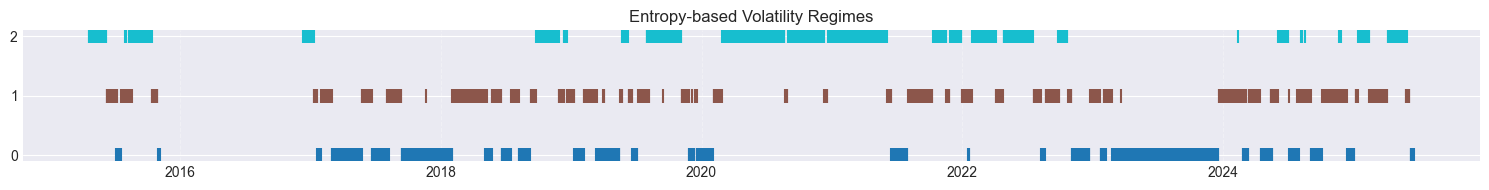

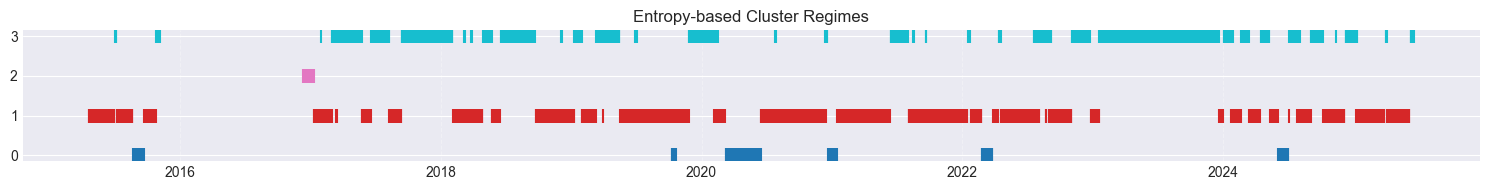

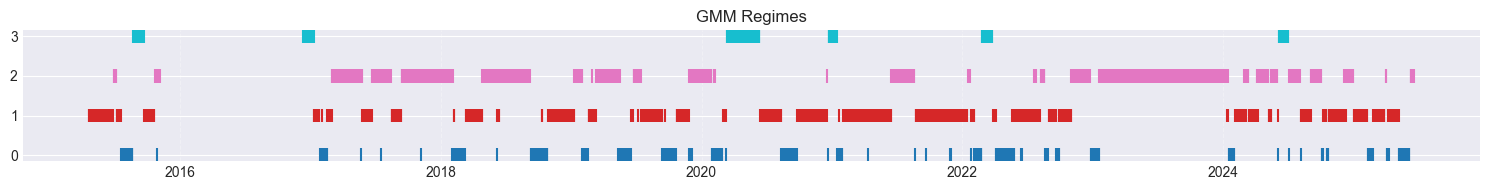

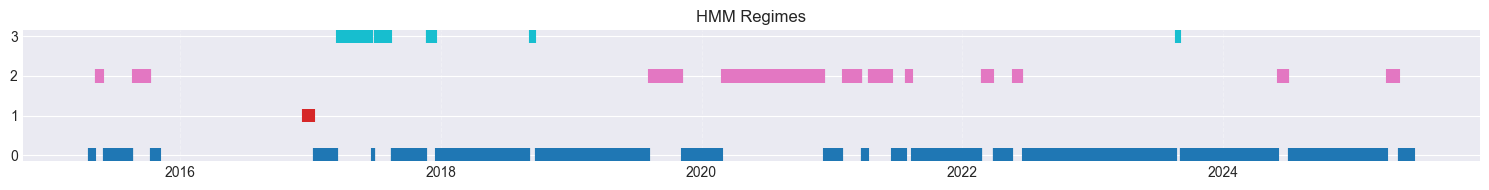

In [14]:
### Step 4: Plot Regime Timeline
def plot_regime_timeline(series, title):
    plt.figure(figsize=(15, 2))
    plt.title(title)
    plt.scatter(series.index, series, c=series, cmap='tab10', marker='|', s=100)
    plt.yticks(sorted(series.unique()))
    plt.grid(True, axis='x', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

plot_regime_timeline(regimes_df['vol_regime'], "Entropy-based Volatility Regimes")
plot_regime_timeline(regimes_df['cluster_regime'], "Entropy-based Cluster Regimes")
plot_regime_timeline(regimes_df['gmm_regime'], "GMM Regimes")
plot_regime_timeline(regimes_df['hmm_regime'], "HMM Regimes")


In [15]:
### Step 5: Regime Overlap Matrix (Cross-tabulation)

# Cross-tabulation to inspect overlaps
print("Volatility Regime vs GMM Regime")
print(pd.crosstab(regimes_df['vol_regime'], regimes_df['gmm_regime']))

print("Cluster Regime vs GMM Regime")
print(pd.crosstab(regimes_df['cluster_regime'], regimes_df['gmm_regime']))

print("Volatility Regime vs HMM Regime")
print(pd.crosstab(regimes_df['vol_regime'], regimes_df['hmm_regime']))

print("Cluster Regime vs HMM Regime")
print(pd.crosstab(regimes_df['cluster_regime'], regimes_df['hmm_regime']))

Volatility Regime vs GMM Regime
gmm_regime    0    1    2    3
vol_regime                    
0            18   21  690    0
1           177  395  157    0
2           163  433    0  155
Cluster Regime vs GMM Regime
gmm_regime        0    1    2    3
cluster_regime                    
0                 8    3    0  135
1               302  800   78    0
2                 0    0    0   20
3                48   46  769    0
Volatility Regime vs HMM Regime
hmm_regime    0   1    2    3
vol_regime                   
0           623   0    6  100
1           668   0   27   34
2           300  20  431    0
Cluster Regime vs HMM Regime
hmm_regime        0   1    2    3
cluster_regime                   
0                17   0  129    0
1               835   0  324   21
2                 0  20    0    0
3               739   0   11  113


C:\Users\iamta\AppData\Local\Temp\ipykernel_3700\1474386291.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=regimes_df.reset_index(), x='vol_regime', palette='Blues')


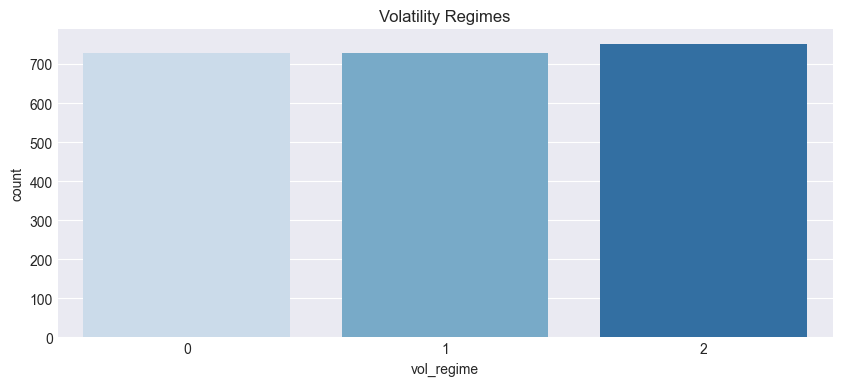

C:\Users\iamta\AppData\Local\Temp\ipykernel_3700\1474386291.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=regimes_df.reset_index(), x='cluster_regime', palette='Greens')


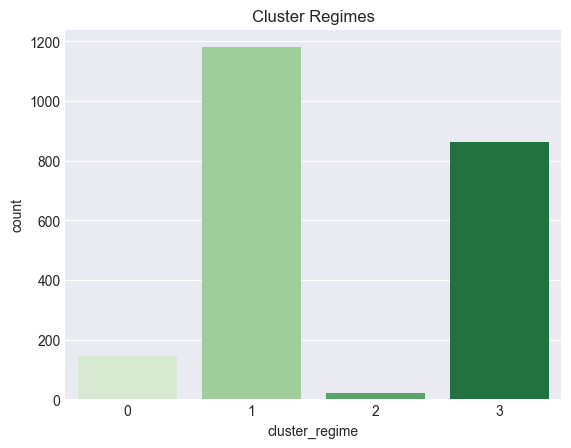

C:\Users\iamta\AppData\Local\Temp\ipykernel_3700\1474386291.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=regimes_df.reset_index(), x='gmm_regime', palette='Oranges')


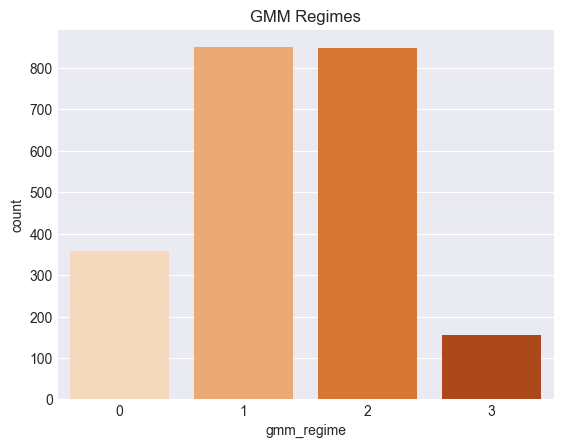

C:\Users\iamta\AppData\Local\Temp\ipykernel_3700\1474386291.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=regimes_df.reset_index(), x='hmm_regime', palette='Purples')


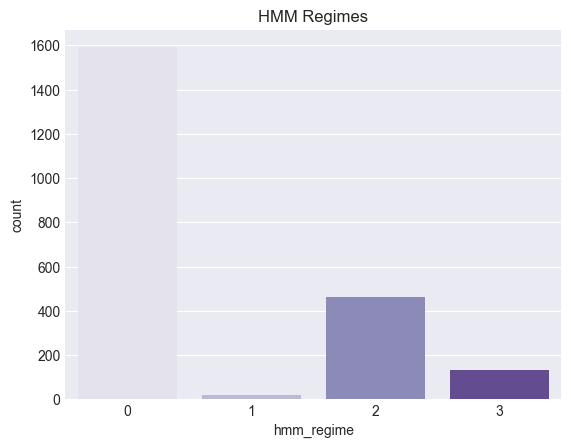

In [16]:
### Step 6: Visual Comparison of Regime Counts

plt.figure(figsize=(10, 4))
sns.countplot(data=regimes_df.reset_index(), x='vol_regime', palette='Blues')
plt.title("Volatility Regimes")
plt.show()

sns.countplot(data=regimes_df.reset_index(), x='cluster_regime', palette='Greens')
plt.title("Cluster Regimes")
plt.show()

sns.countplot(data=regimes_df.reset_index(), x='gmm_regime', palette='Oranges')
plt.title("GMM Regimes")
plt.show()

sns.countplot(data=regimes_df.reset_index(), x='hmm_regime', palette='Purples')
plt.title("HMM Regimes")
plt.show()


In [17]:
### Step 7: Save for Portfolio Use

# Export full combined regime info for downstream use
regimes_df.to_csv("../data/full_regimes_combined.csv")


### Summary:
"""
You now have side-by-side comparison of entropy-based regimes, GMM regimes, and HMM regimes. This helps:
- Observe distribution balance
- Identify periods with regime agreement or divergence
- Select the most promising regime segmentation for robust portfolio design (Notebook 09)

In the next notebook, we’ll analyze portfolio performance using these regimes and select the best one empirically.
"""

'\nYou now have side-by-side comparison of entropy-based regimes, GMM regimes, and HMM regimes. This helps:\n- Observe distribution balance\n- Identify periods with regime agreement or divergence\n- Select the most promising regime segmentation for robust portfolio design (Notebook 09)\n\nIn the next notebook, we’ll analyze portfolio performance using these regimes and select the best one empirically.\n'